##Image classification of MNIST DATASET

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras import backend as k

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows,img_cols=28,28
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
X_train

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
X_train

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=500, epochs=12)

Epoch 1/12
120/120 [==============================] - 47s 43ms/step - loss: 0.8127 - accuracy: 0.7300
Epoch 2/12
120/120 [==============================] - 5s 43ms/step - loss: 0.0938 - accuracy: 0.9716
Epoch 3/12
120/120 [==============================] - 5s 43ms/step - loss: 0.0653 - accuracy: 0.9811
Epoch 4/12
120/120 [==============================] - 5s 43ms/step - loss: 0.0501 - accuracy: 0.9844
Epoch 5/12
120/120 [==============================] - 5s 43ms/step - loss: 0.0390 - accuracy: 0.9889
Epoch 6/12
120/120 [==============================] - 5s 43ms/step - loss: 0.0349 - accuracy: 0.9887
Epoch 7/12
120/120 [==============================] - 5s 44ms/step - loss: 0.0293 - accuracy: 0.9915
Epoch 8/12
120/120 [==============================] - 5s 44ms/step - loss: 0.0262 - accuracy: 0.9923
Epoch 9/12
120/120 [==============================] - 5s 44ms/step - loss: 0.0241 - accuracy: 0.9930
Epoch 10/12
120/120 [==============================] - 5s 44ms/step - loss: 0.0202 - accur

In [ ]:
pred_e=model.predict(X_test)

In [ ]:
pred_e

array([[7.8631456e-11, 8.6602370e-08, 5.5429105e-08, ..., 9.9999940e-01,
        1.1121735e-09, 3.4641675e-07],
       [2.3822185e-08, 3.0717426e-09, 1.0000000e+00, ..., 1.1077298e-10,
        2.2070118e-11, 3.5172521e-13],
       [4.7633527e-08, 9.9999118e-01, 6.8551472e-08, ..., 8.6113812e-07,
        4.3193268e-07, 5.7593383e-08],
       ...,
       [2.9725080e-13, 1.6531819e-09, 6.3788502e-10, ..., 2.2911526e-09,
        2.4345145e-08, 1.7985736e-08],
       [2.9639974e-10, 5.0205995e-09, 1.9251732e-11, ..., 1.2310261e-10,
        5.5718247e-06, 8.1520817e-09],
       [2.3722410e-07, 7.7953883e-09, 1.6223016e-08, ..., 5.0954523e-12,
        1.1528284e-07, 1.5932701e-09]], dtype=float32)

In [ ]:
import numpy as np
pred=np.argmax(pred_e,axis=1)[:]

In [ ]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
for i in pred:
  print('Predicted class is %d and Expected class was %d' % (pred[i],y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 99.35


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[ 978    0    0    0    0    0    1    1    0    0]
 [   1 1133    0    0    0    0    1    0    0    0]
 [   1    0 1028    0    0    0    0    3    0    0]
 [   0    0    1 1008    0    1    0    0    0    0]
 [   0    1    0    0  970    0    3    0    2    6]
 [   1    0    0    6    0  882    2    0    1    0]
 [   1    2    0    0    1    1  953    0    0    0]
 [   0    3    4    1    0    0    0 1017    1    2]
 [   2    0    2    1    0    0    0    1  967    1]
 [   1    0    1    0    4    3    0    1    0  999]]


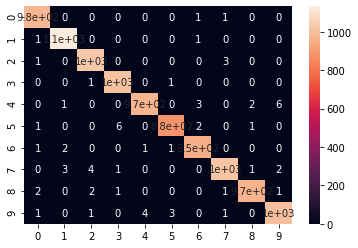

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)